# Data Scientist Professional Practical Exam Submission

**Use this template to write up your summary for submission. Code in Python or R needs to be included.**


## 📝 Task List

Your written report should include both code, output and written text summaries of the following:
- Data Validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Model Development
  - Include your reasons for selecting the models you use as well as a statement of the problem type
  - Code to fit the baseline and comparison models
- Model Evaluation
  - Describe the performance of the two models based on an appropriate metric
- Business Metrics
  - Define a way to compare your model performance to the business
  - Describe how your models perform using this approach
- Final summary including recommendations that the business should undertake

*Start writing report here..*

# Data Validation


The data contains 947 observations with 581 total missing values.
52 missing values each of the calories, carbohydates, sugar, protein and 373 in high_traffic column, these last correspond to all recipies that were not catalogued as popular. Therefore we performed manipulation tasks on a variety of rows and had the following outcome:

**recipe**: No tasks were performed. Index variable to identify order of recipies.  

**calories**: Null values were sustuded by the corresponding mean of calories for recipes that belonged to the same category. Numeric positive variable.

**carbohydrate**: Null values were sustuded by the corresponding mean of carbohydrate for recipes that belonged to the same category. Numeric positive variable.

**sugar**: Null values were substituded by the corresponding mean of sugar for recipes that belonged to the same category. Numeric positive variable.

**protein**: Null values were substituded by the corresponding mean of protein for recipes that belonged to the same category. Numeric positive variable.

**category**: An extra category was found, "Chicken Breast", transformed into "Chicken" due to similarity. Categorical variable, 10 groups of recipes.

**serving**: Two non wished variables were found, "4 as a snack" and "6 as a snack", they were transformed into 4 and 6 respectively. Data was also transformed into integer. Numeric positive variable.

**high_traffic**: Missing values were substituded by "Low", further we will have to transform data in numeric format in order to fit a model. Categorical variable two groups 




In [1]:
# Start coding here...
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm 
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

#Loas data
recipe=pd.read_csv("recipe_site_traffic_2212.csv")


Computation of shape of data, number of Nan values, and Nan values by row. We can see the number mentioned previously

In [2]:
print(recipe.shape)
print(recipe.isna().sum().sum())
print(recipe.isna().sum())

(947, 8)
581
recipe            0
calories         52
carbohydrate     52
sugar            52
protein          52
category          0
servings          0
high_traffic    373
dtype: int64


Validate category and serving variable. Replacing extra data with corresponding equalities:

**category**
- "Chicken Breast" --> "Chicken"

**serving**

- '4 as a snack' --> 4 

- '6 as a snack' --> 6


In [3]:
#Unique category values
print("Unique category values:",recipe["category"].unique())
#Unique servings values
print("\nUnique servings values:", recipe["servings"].unique())



Unique category values: ['Pork' 'Potato' 'Breakfast' 'Beverages' 'One Dish Meal' 'Chicken Breast'
 'Lunch/Snacks' 'Chicken' 'Vegetable' 'Meat' 'Dessert']

Unique servings values: ['6' '4' '1' '2' '4 as a snack' '6 as a snack']


In [4]:
#Replace values
recipe["servings"]=recipe["servings"].replace("4 as a snack","4").replace("6 as a snack","6").astype(int)
recipe["category"]=recipe["category"].replace("Chicken Breast","Chicken")


print("New category values:",recipe["category"].unique())
print("\nNew servings values:", recipe["servings"].unique())

New category values: ['Pork' 'Potato' 'Breakfast' 'Beverages' 'One Dish Meal' 'Chicken'
 'Lunch/Snacks' 'Vegetable' 'Meat' 'Dessert']

New servings values: [6 4 1 2]


Validate and fix the high_traffic variable. Filling all the NaN observations with "Low"

In [5]:
#Unique high_traffic values
print("Unique high traffic values:",recipe["high_traffic"].unique())

Unique high traffic values: ['High' nan]


In [6]:
#Replace values 
recipe["high_traffic"]=recipe["high_traffic"].fillna("Low")
print("New unique high traffic values:",recipe["high_traffic"].unique())

New unique high traffic values: ['High' 'Low']


Upon checking the missing data, we observed that all null values for the continuous variables appear in the same rows. Although dropping these rows is an option, we opted to impute the missing values with the mean of each category instead. This approach leverages the similarity in nutritional attributes among recipes within the same category, which we expect to improve model performance.

In [7]:
# Query rows with null values in all four columns
recipe.loc[recipe["calories"].isna() & recipe["sugar"].isna() & recipe["protein"].isna() & recipe["carbohydrate"].isna()]

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
23,24,NaN,NaN,NaN,NaN,Meat,2,Low
48,49,NaN,NaN,NaN,NaN,Chicken,4,Low
82,83,NaN,NaN,NaN,NaN,Meat,4,High
89,90,NaN,NaN,NaN,NaN,Pork,6,High
116,117,NaN,NaN,NaN,NaN,Chicken,6,High
121,122,NaN,NaN,NaN,NaN,Dessert,2,High
136,137,NaN,NaN,NaN,NaN,One Dish Meal,2,High
149,150,NaN,NaN,NaN,NaN,Potato,2,High
187,188,NaN,NaN,NaN,NaN,Pork,4,High


In [8]:
columns_to_fill = ['calories', 'sugar', 'protein','carbohydrate']

# Fill NaNs for each specified column based on the mean of each continuos variable
for col in columns_to_fill:
    recipe[col] = recipe[col].fillna(recipe.groupby('category')[col].transform('mean'))

print(recipe.isna().sum())

recipe          0
calories        0
carbohydrate    0
sugar           0
protein         0
category        0
servings        0
high_traffic    0
dtype: int64


# Exploratory analysis


An auxiliary variable, "high_continuous," was created to store the target variable as an integer format, allowing for easier visualization in our plots.

First we create a pie chart with the percentage of observations that fall into each category from the high-traffic column.
The amount of observations for both cases is satisfactory for a target variable. We also see that the there is a higher sample of high traffic observations

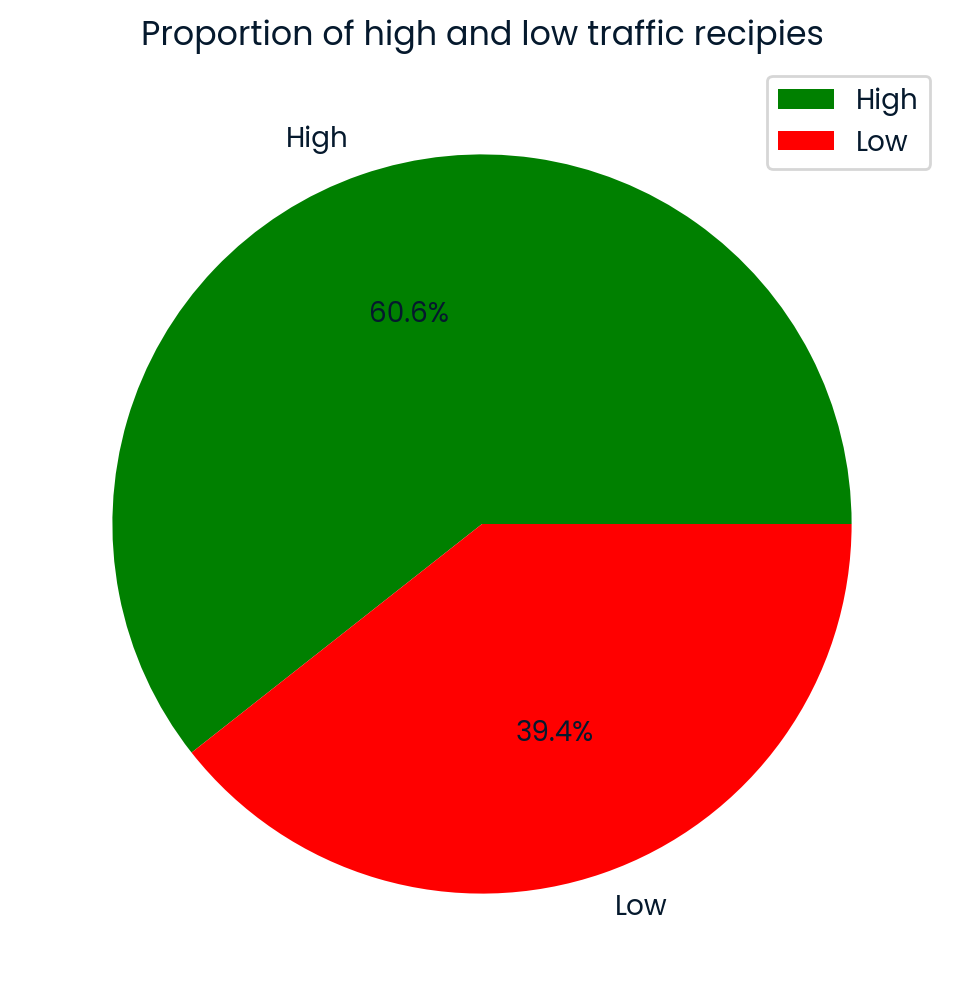

In [11]:
# setting figure size
plt.figure(figsize=(6,6))
# Pie plot using matplotlib
plt.pie(list(recipe["high_traffic"].value_counts()),labels=["High","Low"],colors=["green","red"],autopct='%1.1f%%')
#Setting title and legen
plt.title("Proportion of high and low traffic recipies")
plt.legend()
plt.savefig("pieplot_recipe.jpg")


The four histograms reveal that all continuous variables are approximately log-normally distributed. However, they differ in their mean levels and particularly in variance, with the calories variable displaying notably high values (because it is measured in Kcals not in grams). When preprocessing the data for modeling, we will need to standardize these quantitative variables to ensure that their scales do not afect the model performance.

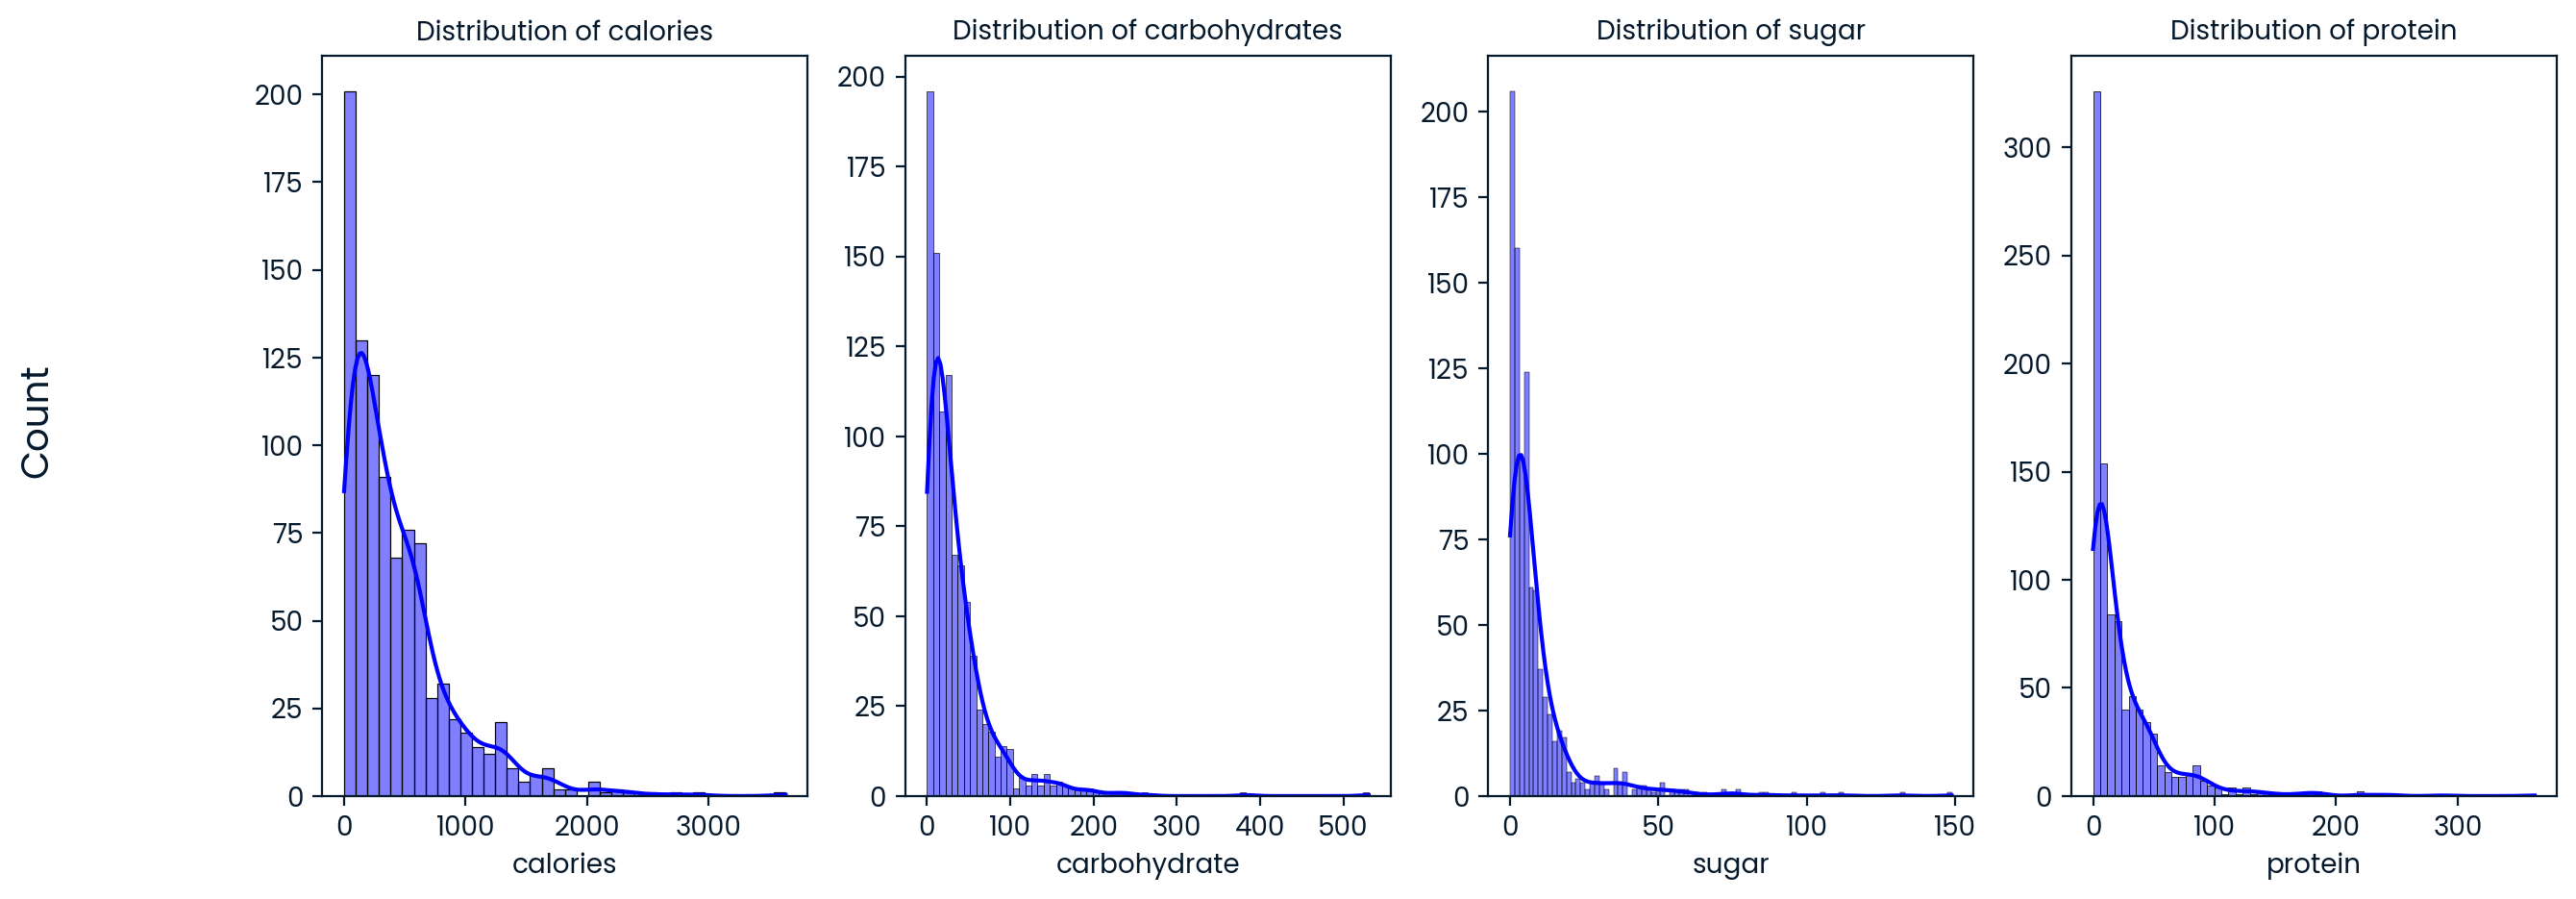

In [10]:
#Set plot grid
fig, (ax1, ax2,ax3,ax4) = plt.subplots(1, 4, figsize=(15, 5))

#Protein histogram
sns.histplot(x="protein", data=recipe, color="blue",
             ax=ax4,kde=True).set_title(label="Distribution of protein",fontsize=10)
#Carbohydrate histogram
sns.histplot(x="carbohydrate", data=recipe, color="blue", 
             ax=ax2,kde=True).set_title(label="Distribution of carbohydrates",fontsize=10)
#Sugar histogram
sns.histplot(x="sugar", data=recipe, color="blue",
             ax=ax3,kde=True).set_title(label="Distribution of sugar",fontsize=10)
#Calories histogram
sns.histplot(x="calories", data=recipe, color="blue",ax=ax1,kde=True).set_title(label="Distribution of calories",fontsize=10)

#Delete x labels                                        
ax1.set(ylabel=None)
ax2.set(ylabel=None)
ax3.set(ylabel=None)
ax4.set(ylabel=None)

#Save common xlabel
fig.supylabel("Count", fontsize=14)

plt.show()

We can conclude from these countplots:

**First category count plot**: Recipes of all types have been consistently created over the enterprise's lifetime. While chicken recipes are the most common, each category has around 65-100 samples , suggesting consistent predictions across categories. Predictions from all categories are to be consistent therefore

**Second category countplot by high_traffic**: There is a noticeable difference between number of high and low traffic recipies in some categories. People seem to be spending more time on the web when things like pork, potato, vegetable, meat, dessert or one dish meals are being posted. On the other hand beverages, chicken (despite of the big volume of recipies) or brekfast types seem to lack that popularity.

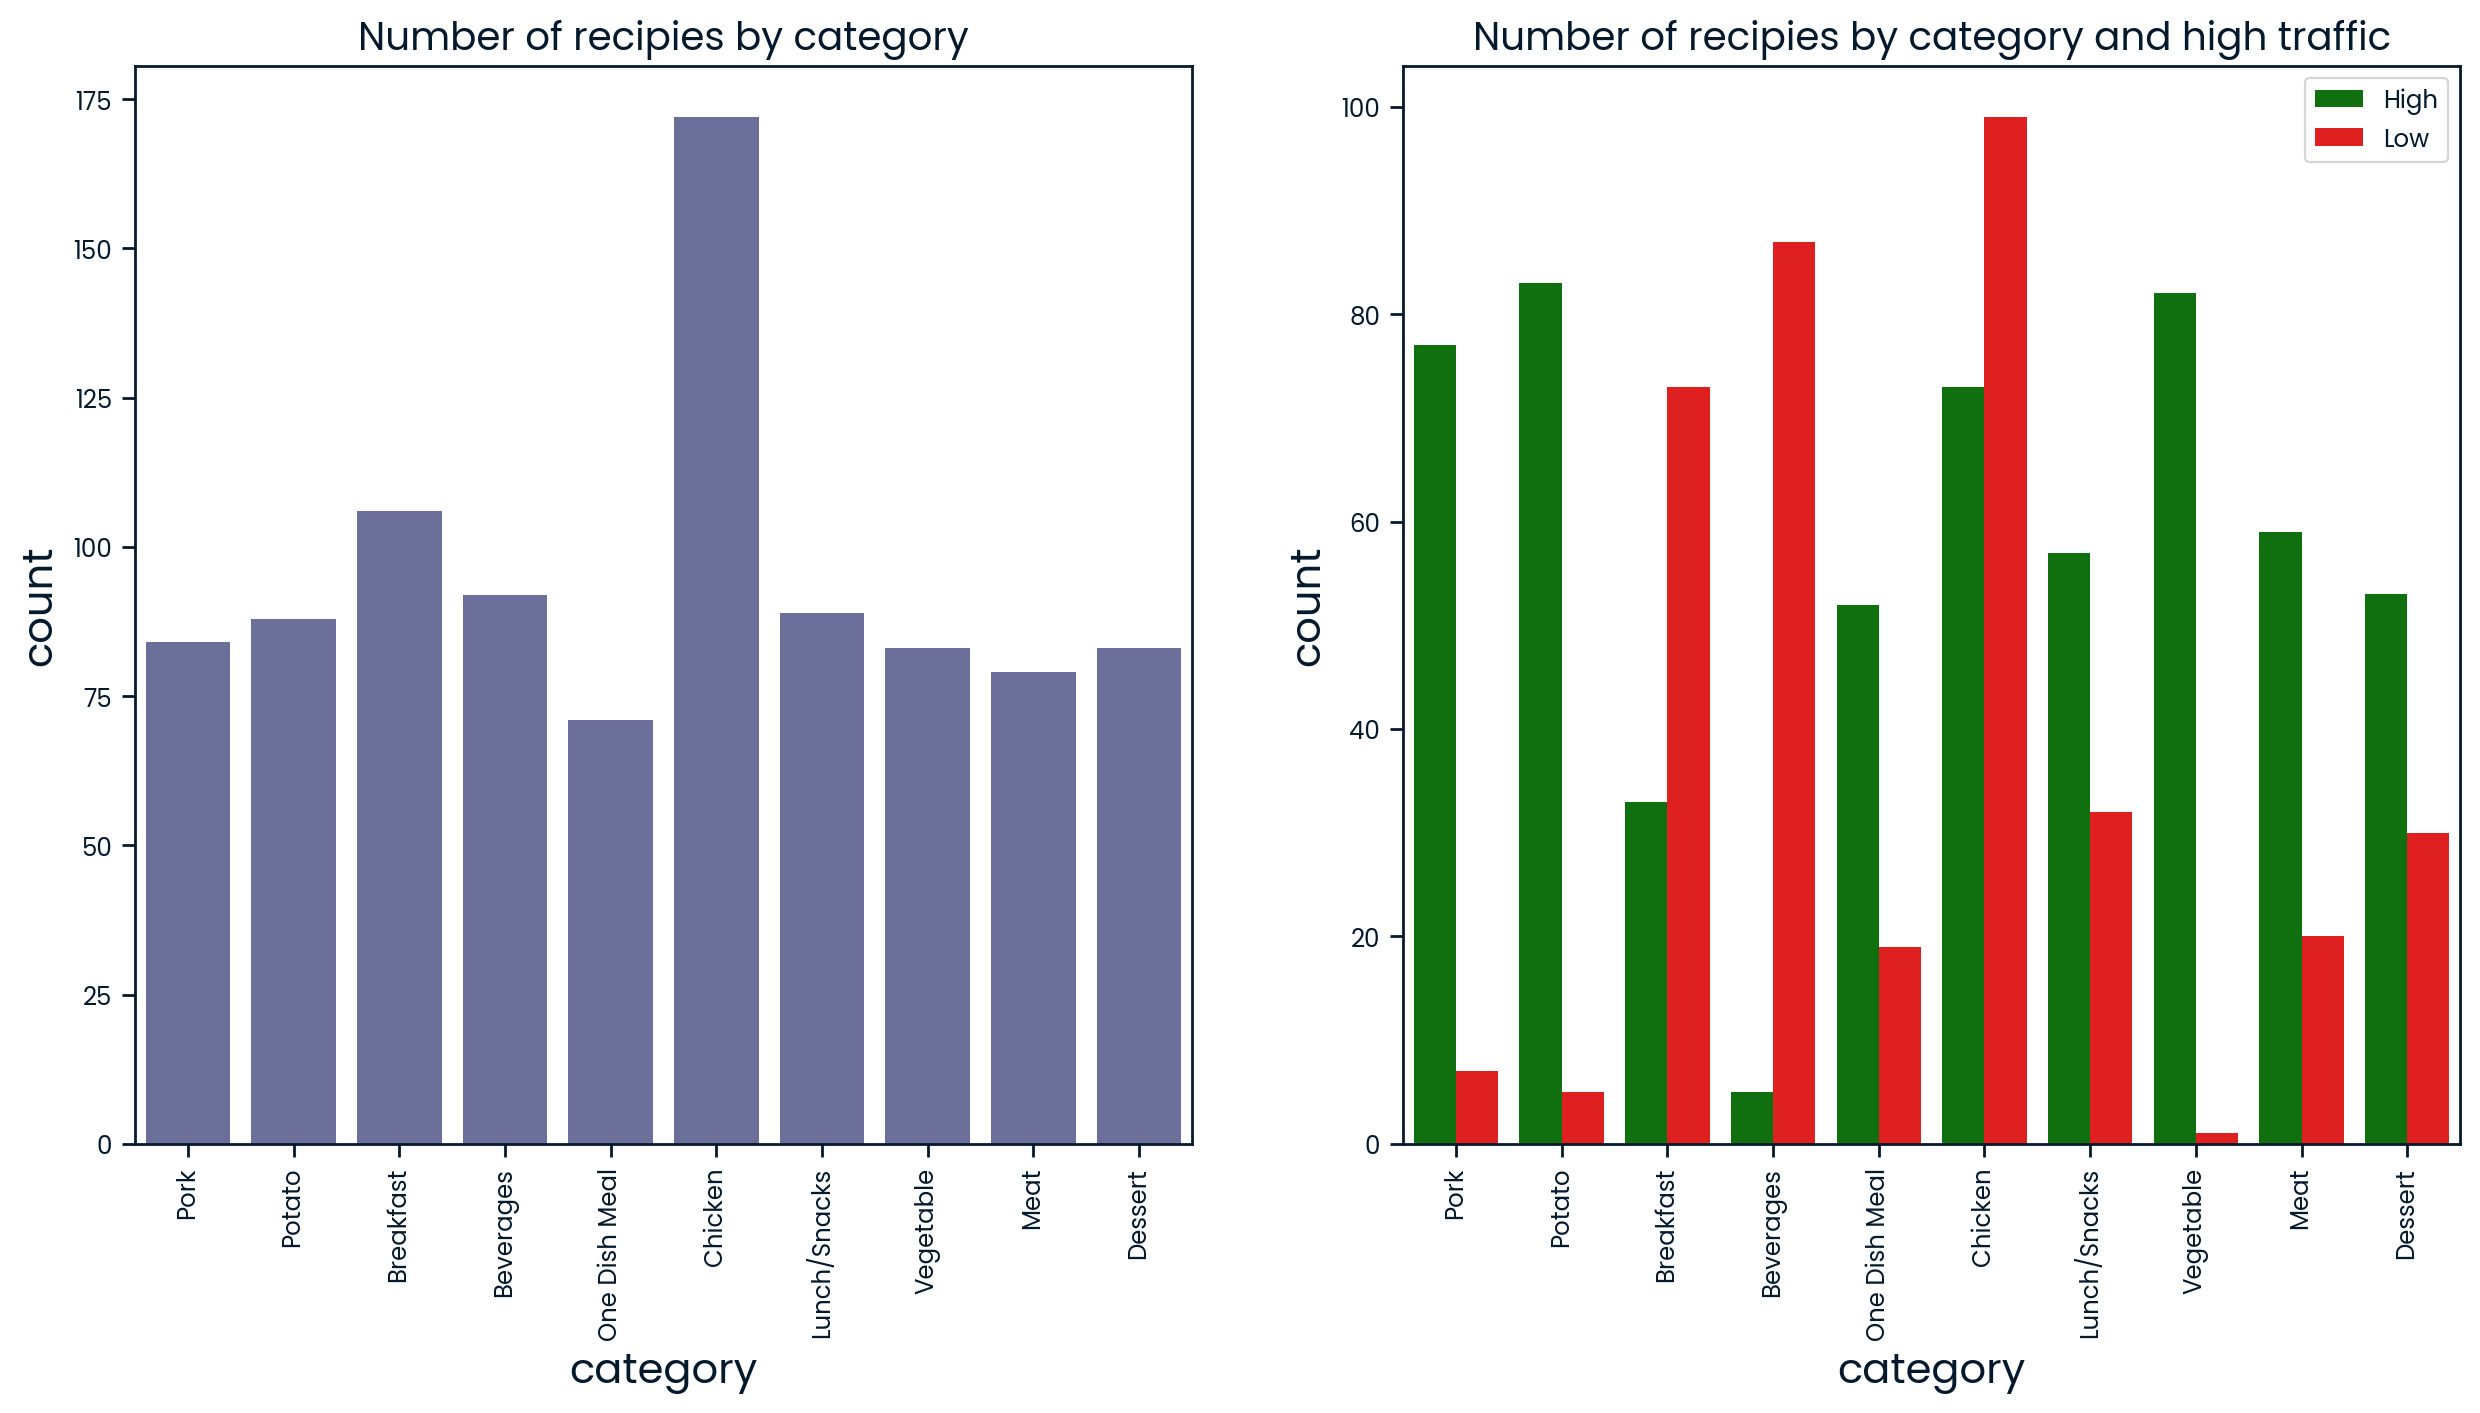

In [46]:
#Set plot grid
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))

#First countplot category number
sns.countplot(x="category",data=recipe,ax=ax1).set_title(label="Number of recipies by category",fontsize=14)
plt.setp(ax1.get_xticklabels(), rotation=90)

#Second countplot category  by high_traffic
sns.countplot(x="category",data=recipe,hue="high_traffic",palette=["green","red"],ax=ax2).set_title(label="Number of recipies by category and high traffic",fontsize=14)
plt.setp(ax2.get_xticklabels(), rotation=90)

#Set legend
plt.legend(["High","Low"])
plt.show()

**First servings count plot**: Number of recipies seems to be similar except for 4 servings having almost twice as much as any other

**Second servings countplot by high_traffic**: The ratio of high-traffic to low-traffic recipes appears consistent across all serving sizes, with a slight increase in popularity for recipes serving 6, though this difference is almost imperceptible.








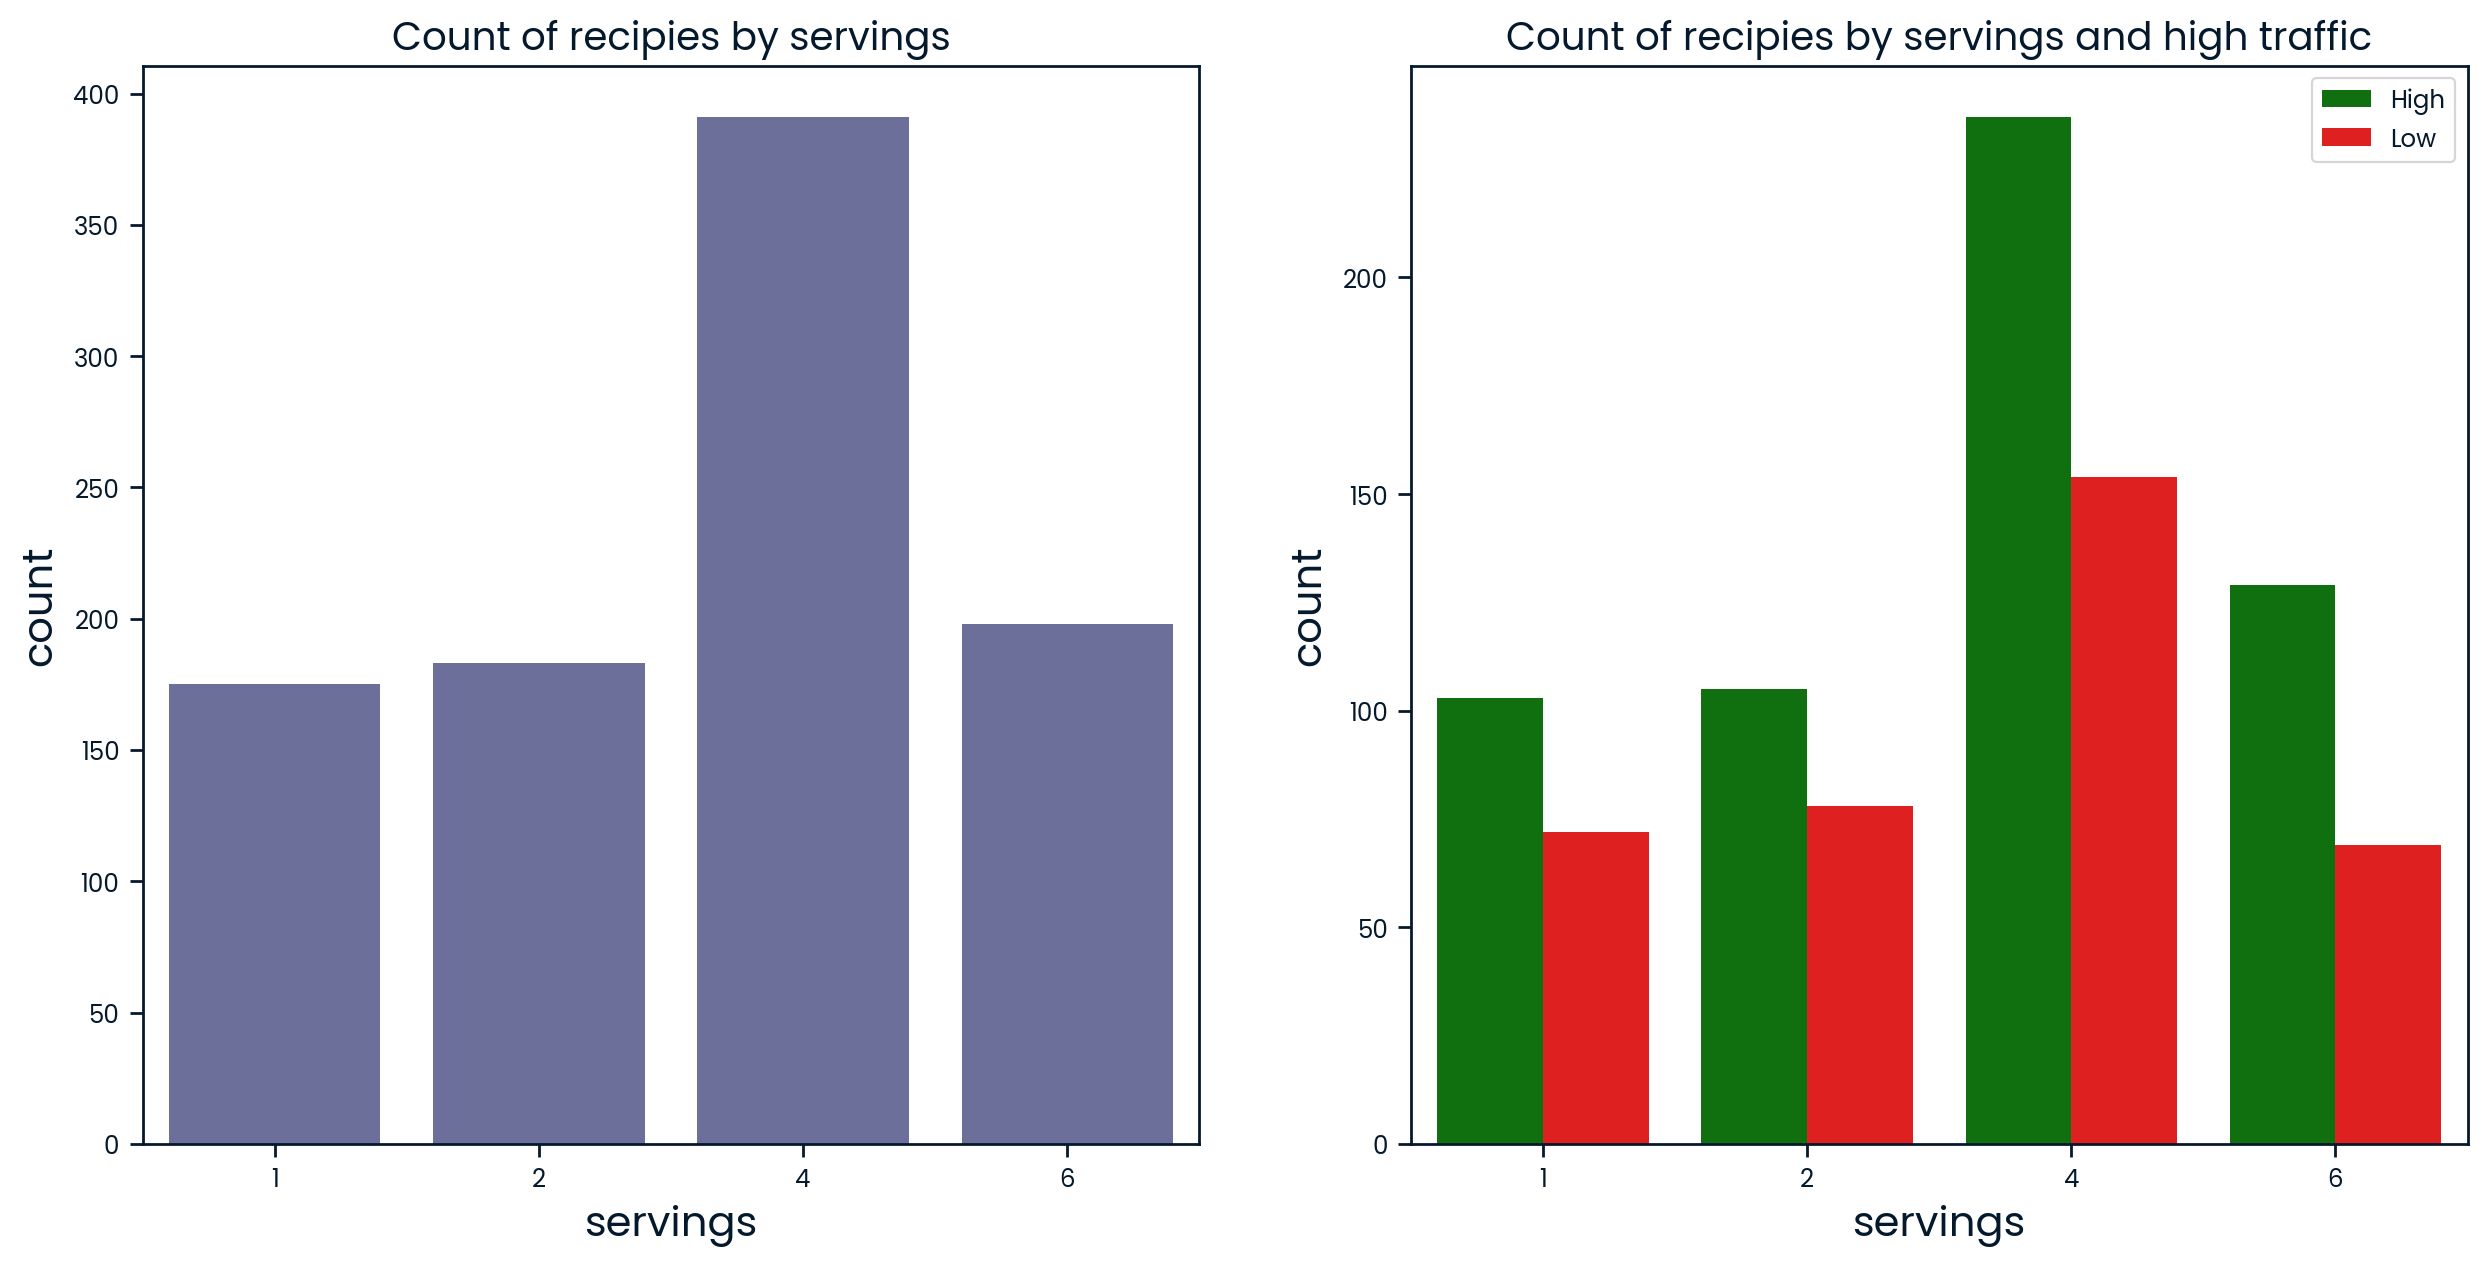

In [47]:
#Set plot grid
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))

#First countplt servings number
sns.countplot(x="servings",data=recipe,ax=ax1).set_title(label="Count of recipies by servings",fontsize=14)

#Second countplot servings number by high_traffic
sns.countplot(x="servings",data=recipe,hue="high_traffic",palette=["green","red"],ax=ax2,hue_order=["High","Low"]).set_title(label="Count of recipies by servings and high traffic",fontsize=14)

#Set legend
plt.legend(["High","Low"])
plt.show()

Heatmap shown below does not show any significant correlation between continous variables (to avoid colinearity) neither with the target variable. 

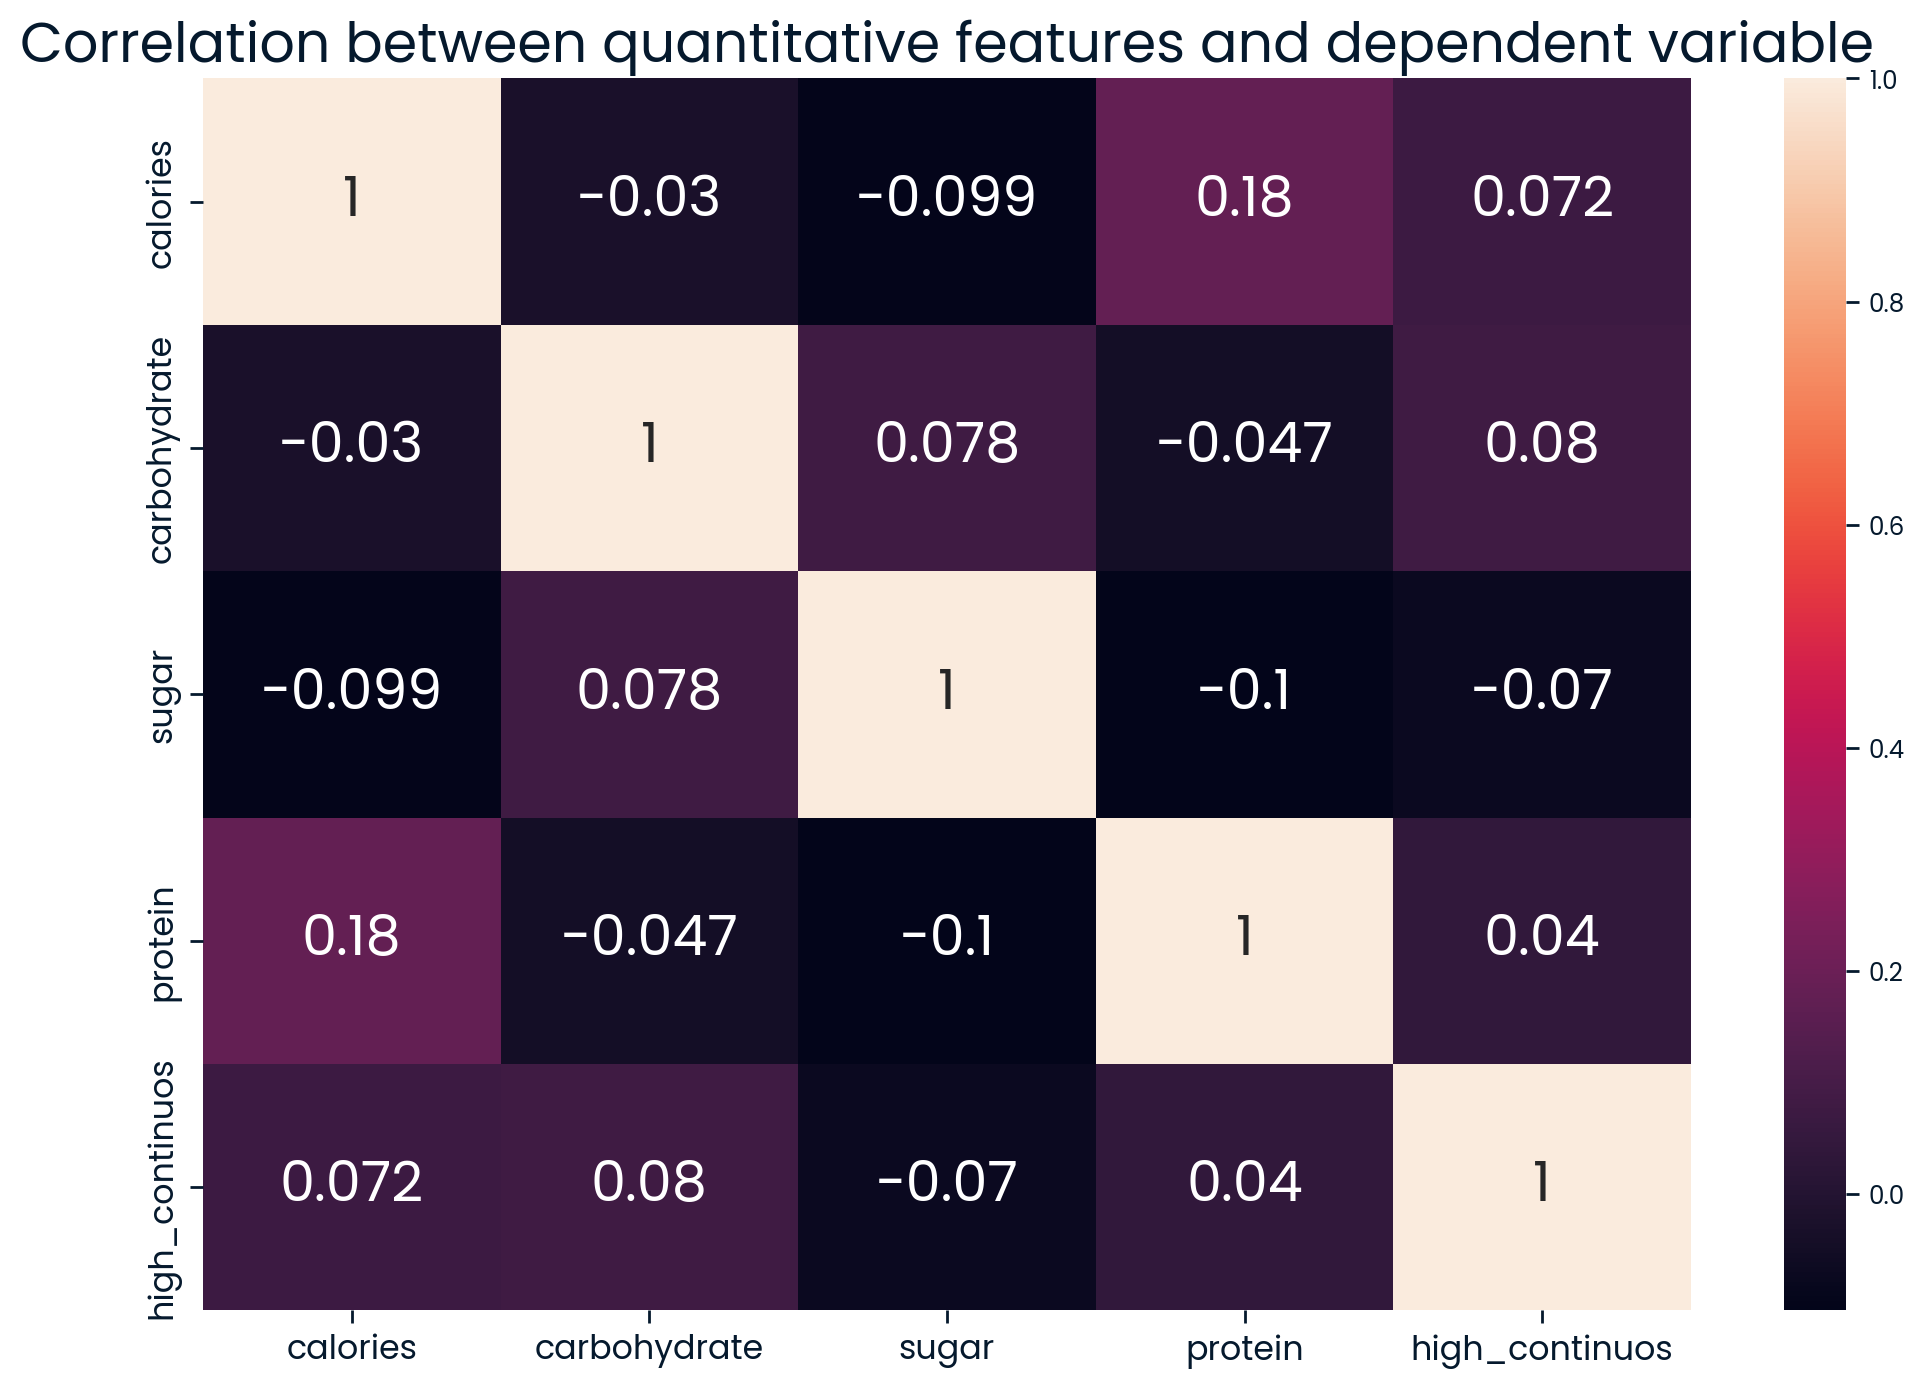

In [16]:
# Subset continuos data
recipe["high_continuos"]=recipe["high_traffic"].replace("High",1).replace("Low",0)
recipe_continuos=recipe[["calories","carbohydrate","sugar","protein","high_continuos"]]

#Set figure size and style
plt.figure(figsize=(12,8))
sns.set_context("paper", rc={"font.size":20,"axes.titlesize":20,"axes.labelsize":15})

#Plot heatmap
sns.heatmap(recipe_continuos.corr(),annot=True).set(title="Correlation between quantitative features and dependent variable")
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.show()

Since we have already assessed the distributions of these variables, we can confirm that their means and variances differ, especially in the case of calories. 
Plotting with respct to the high traffic variables enables us too see how the mean and variance does not differ greatly between high and low samples for these continuos variables. This suggests that customers do not seem to be too interested in calories intake or nutrition qualities of our recipies

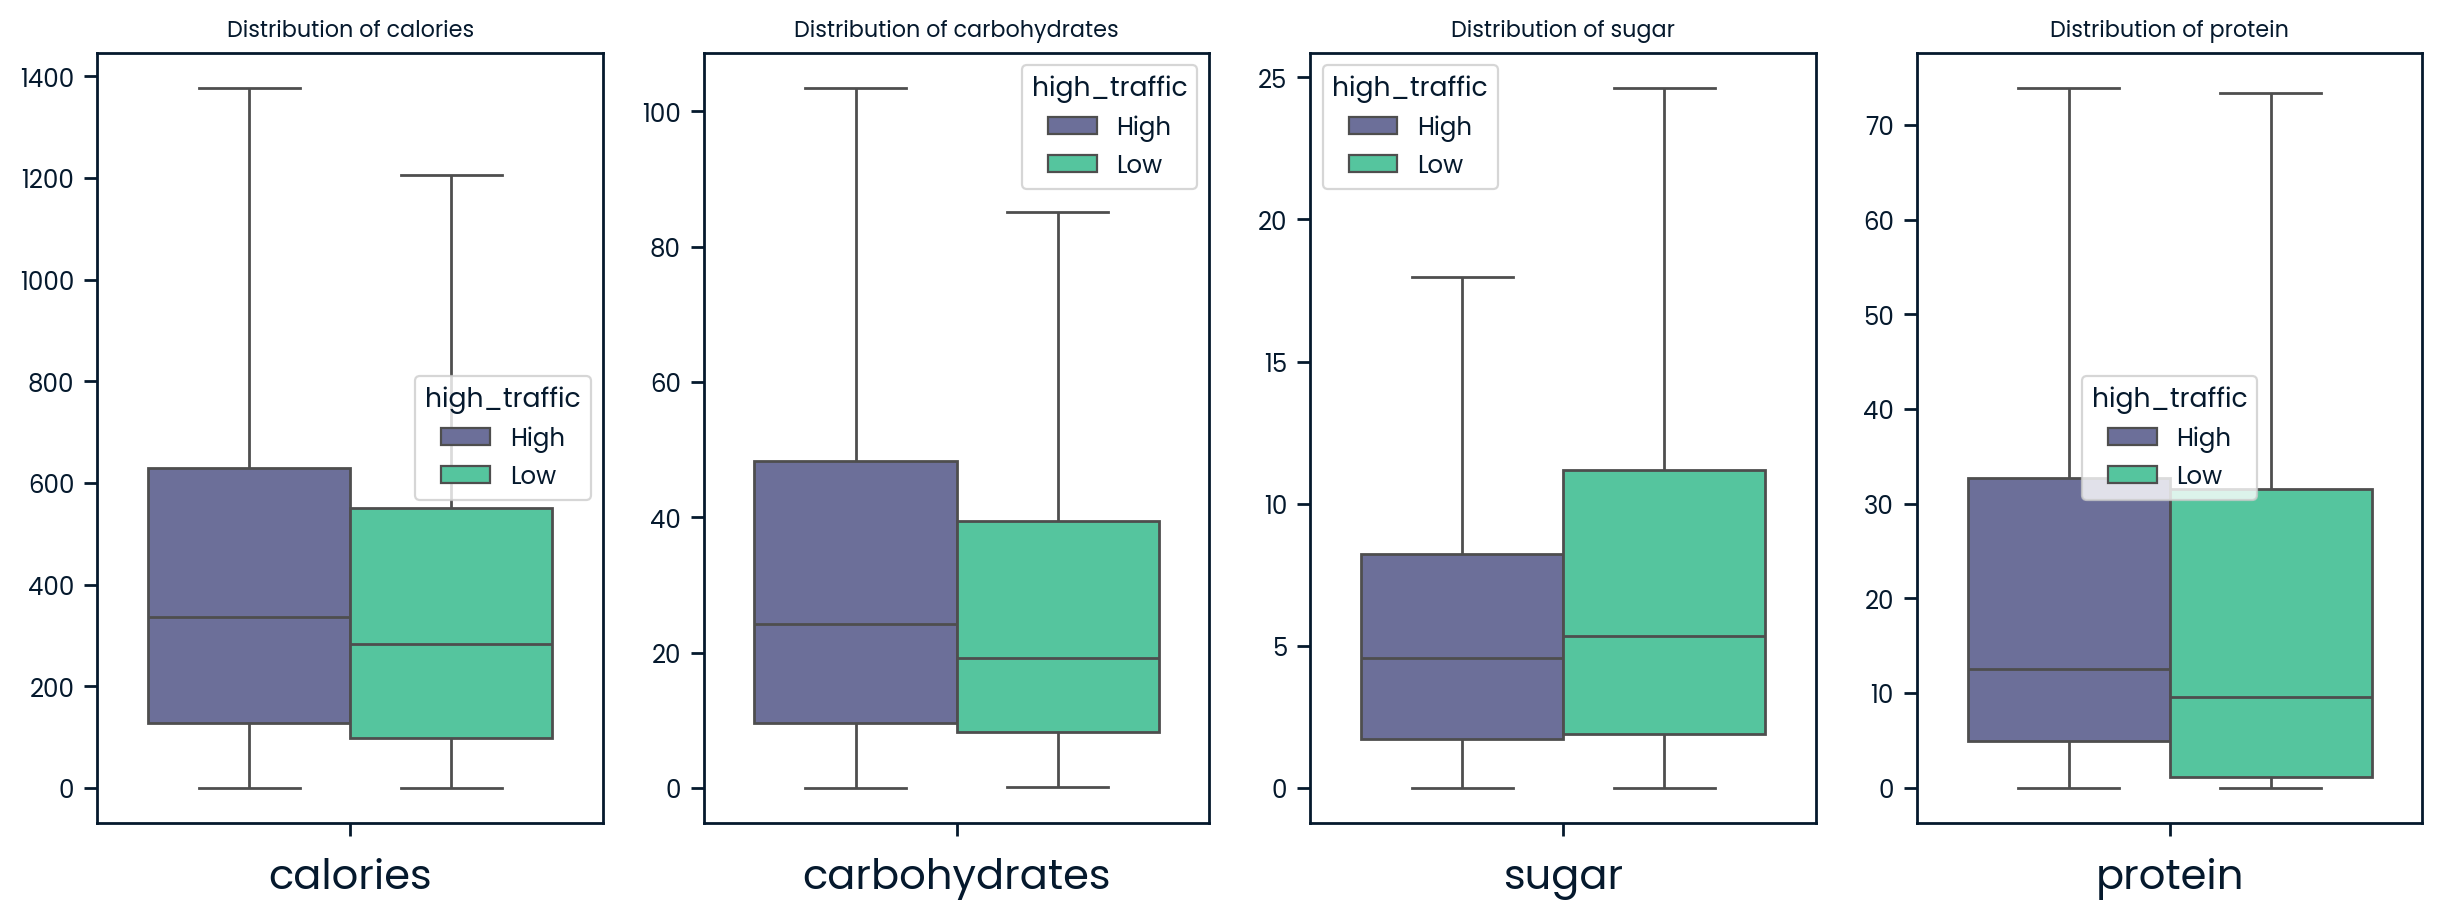

In [49]:
# Define plot grid
fig, (ax1, ax2, ax3,ax4) = plt.subplots(1, 4, figsize=(15, 5))

# Calories boxplot
sns.boxplot(y="calories",ax=ax1,data=recipe,hue="high_traffic",showfliers=False).set_title(label="Distribution of calories",fontsize=8)
# Carbohydrate boxplot
sns.boxplot(y="carbohydrate",data=recipe,ax=ax2,hue="high_traffic",showfliers=False).set_title(label="Distribution of carbohydrates",fontsize=8)
# Sugar boxplot
sns.boxplot(y="sugar",  data=recipe,ax=ax3,hue="high_traffic",showfliers=False).set_title(label="Distribution of sugar",fontsize=8)
# Protein boxplot
sns.boxplot(y="protein",  data=recipe,ax=ax4,hue="high_traffic",showfliers=False).set_title(label="Distribution of protein",fontsize=8)

ax1.set(ylabel=None,xlabel="calories")
ax2.set(ylabel=None,xlabel="carbohydrates")
ax3.set(ylabel=None,xlabel="sugar")
ax4.set(ylabel=None,xlabel="protein")

plt.show()

# Model development

Trying to predict a binary target variable like high_traffic with only two possible outcomes is a classification problem, where we try to estimate whethere our observations fall into high or low traffic.

We will fit two models to our data, logistic regression and gradient boosting classifier.

I chose logistic regression for the interpretability purposes, being a very handy method that can have good results in small datasets. Gradient boosting was elected due to it´s in theory superior predictive qualities

To measure model performance we will compute accuaracy, precision and recall (cross validated and common), but our 


## Preprocessing
To prepare the data for model fitting, the following preprocessing steps are applied:

**Data Splitting**: The data is divided into the target variable, "y," and explanatory features, "X." The recipe column is dropped as it serves only as an index and does not contribute to the model. The dependent variable the integer version of our high_traffic column

**Standardization**: The calories, carbohydrates, sugar, and protein variables are standardized to ensure their scales do not disproportionately impact the model. Each value is adjusted by subtracting the mean and dividing by the standard deviation.

**Dummy samples**: The category variable is converted into dummy variables, creating one binary column per category. This transformation enhances interpretability and allows to fit a qualitative variable to our model

In [50]:
#Set X ,y 
y=recipe["high_continuos"]
X=recipe.drop(columns=["recipe","high_traffic","high_continuos"])


In [51]:
# Create dummy variables 
X=pd.get_dummies(columns=["category"],data=X,dtype=int)


In [52]:
# Standarize continuos data
standardscaler=StandardScaler()
X.loc[:,("calories","carbohydrate",
              "sugar","protein")]=standardscaler.fit_transform(X.loc[:,("calories","carbohydrate","sugar","protein")])

We will split the data into train set and test set. They are used to fit the model and evaluate the performance of the result, comparing the expected outcomes with the models responses.

In [53]:
# Train test split the data
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,random_state=4,test_size=0.2)

## Logistic Regression
Here we fit a base-line logistic regression model to our training data and make predictions assesing performance with our testing data
We will use statsmodels library to evaluate feature significance from a statistical perspective, however final predictions will be performed using scikit-learn, as well as coefficient estimates

In [54]:
# Fit our logistic regression to our training data using statsmodels
sm_logistic = sm.Logit(y_train, X_train).fit() 

#Fit logistic model to our  training data using sklearn
sk_logistic=LogisticRegression().fit(X_train,y_train)

# Model summary
sm_logistic.summary()

Optimization terminated successfully.
         Current function value: 0.483045
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         high_continuos   No. Observations:                  757
Model:                          Logit   Df Residuals:                      742
Method:                           MLE   Df Model:                           14
Date:                Sat, 09 Nov 2024   Pseudo R-squ.:                  0.2794
Time:                        11:19:22   Log-Likelihood:                -365.66
converged:                       True   LL-Null:                       -507.46
Covariance Type:            nonrobust   LLR p-value:                 3.093e-52
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
calories                   0.0138      0.090      0.153      0.878      -0.163       0.191
carbohydrate               0.0214      0.098      0.218      0.827      -0.171       0.214
sugar                     -0.0581      0.098     -0.591      0.555      -0.251       0.135
protein                    0.0413      0.091      0.453      0.651      -0.138       0.220
servings                  -0.0066      0.052     -0.127      0.899      -0.109       0.096
category_Beverages        -2.6942      0.555     -4.858      0.000      -3.781      -1.607
category_Breakfast        -0.6714      0.297     -2.257      0.024      -1.254      -0.088
category_Chicken          -0.4215      0.255     -1.652      0.099      -0.922       0.079
category_Dessert           0.4650      0.379      1.227      0.220      -0.278       1.208
category_Lunch/Snacks      0.6214      0.307      2.025      0.043       0.020       1.223
category_Meat              1.1518      0.337      3.419      0.001       0.492       1.812
category_One Dish Meal     0.9235      0.339      2.725      0.006       0.259       1.588
category_Pork              2.5452      0.510      4.991      0.000       1.546       3.545
category_Potato            2.5436      0.508      5.006      0.000       1.548       3.539
category_Vegetable         4.2127      1.028      4.097      0.000       2.198       6.228
==========================================================================================
"""

In [55]:
#Predictions using sklearn
y_pred=sk_logistic.predict(X_test)


In [64]:
# Model confusion matrix
logit_confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print("Confusion matrix: \n",logit_confusion_matrix)

# Model Accuracy 
logit_accuaracy=metrics.accuracy_score(y_test, y_pred)
print("\nAccuracy , percentage of correctly classified observations:",round(logit_accuaracy,4)*100)

# Model Recall
logit_recall=metrics.recall_score(y_test, y_pred)
print("Recall, percentage of correctly classified high traffic observations:",round(logit_recall,4)*100)

# Model Cross validation accuaracy 
logit_cv_score=cross_val_score(sk_logistic,X, y,cv=5,scoring="recall").mean()
print("CV score, mean percentage of correctly classified high traffic observations:",round(logit_cv_score,4)*100)

Confusion matrix: 
 [[58 17]
 [24 91]]

Accuracy , percentage of correctly classified observations: 78.42
Recall, percentage of correctly classified high traffic observations: 79.13
CV score, mean percentage of correctly classified high traffic observations: 80.85


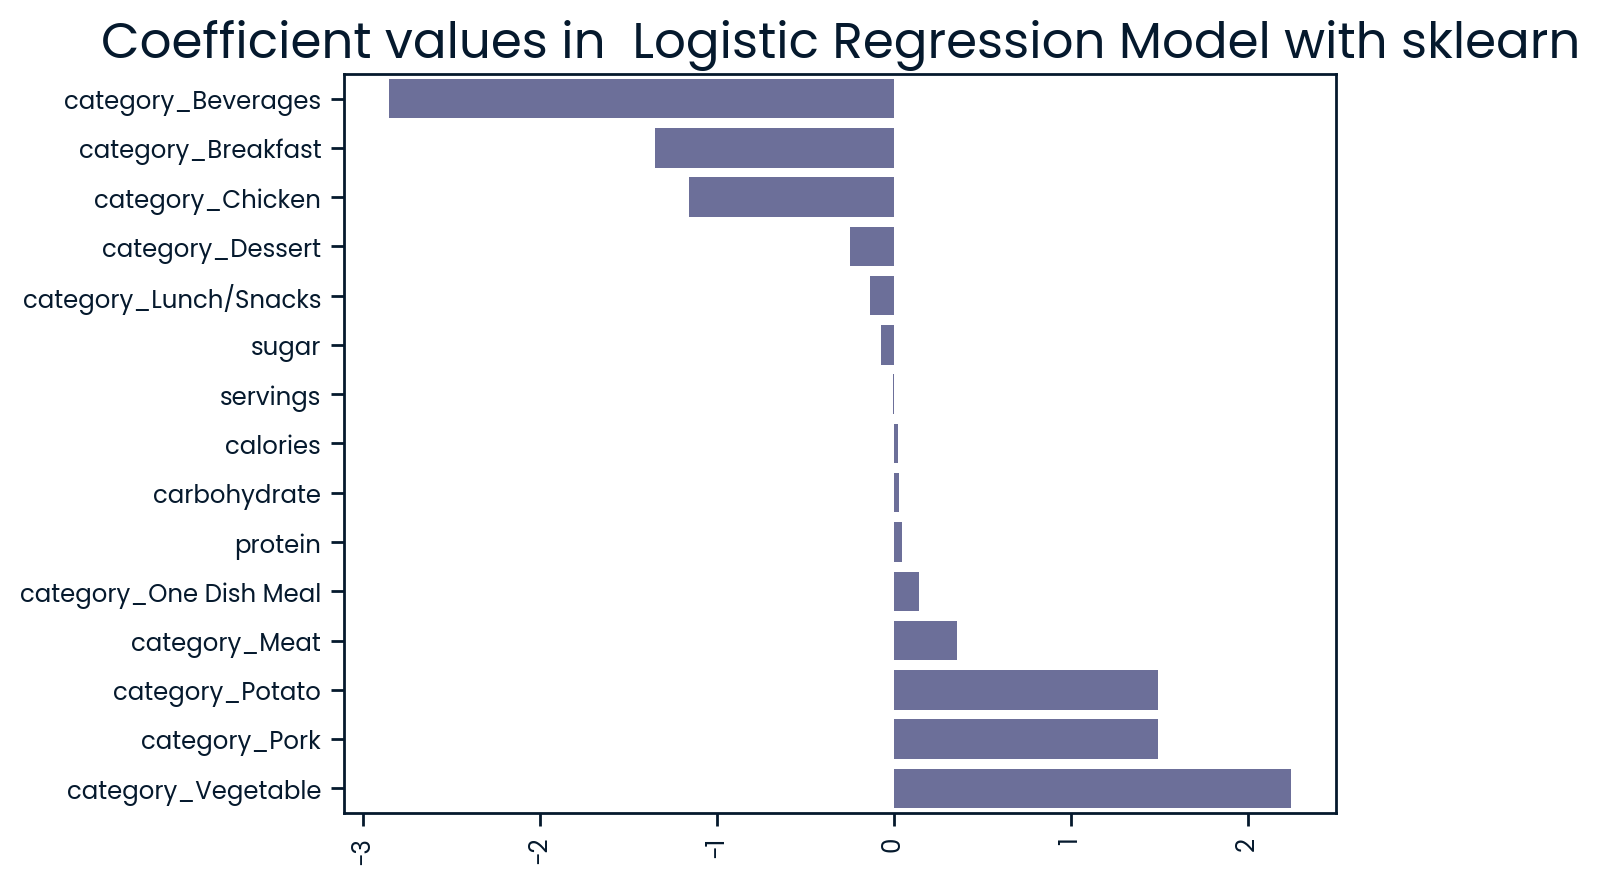

In [57]:
# Create dictionary with features names and coefficients
features= list(X.columns)

# Features coefficients 
coefficients= list(sk_logistic.coef_)

#Index order of coefficients
index = (np.argsort(coefficients)[::-1]).tolist()[0]

#Names of the features in order of importance
names = [features[i] for i in index]
    
#Plot the sorted importances
sns.barplot(y=names,x=np.sort(coefficients[0]))
plt.xticks(rotation=90)
plt.title('Coefficient values in  Logistic Regression Model with sklearn', fontsize=18)
plt.show()


## Gradient Boosting Classification
We will use the sklearn library to fit a Gradient Boosting model. Before this, we performed hyperparameter tuning with Random Search over five parameters of the Gradient Boosting model, including the option for Stochastic Gradient Boosting within the search grid, subsampling for every iteration over proportions of our data.

In [24]:
#Set parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],  # Number of boosting stages to be run
    'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3],  # Step size shrinkage used in update to prevent overfitting
    'max_depth': [3, 4, 5, 6],  # Maximum depth of the individual regression estimators
    'subsample': [0.6, 0.8, 1.0],  # Fraction of samples used for fitting the individual base learners
    'max_features': ['auto', 'sqrt', 'log2']  # Number of features to consider when looking for the best split
}

gradient=GradientBoostingClassifier()

#RandomSearch through the grid
random=RandomizedSearchCV(gradient,param_grid,n_jobs=-1).fit(X,y)
random.best_params_

{'subsample': 1.0,
 'n_estimators': 300,
 'max_features': 'log2',
 'max_depth': 5,
 'learning_rate': 0.01}

In [31]:
gradient=GradientBoostingClassifier(subsample= 1, n_estimators= 300, 
                                    max_depth= 5, learning_rate= 0.01,max_features="log2")
gradient.fit(X_train,y_train)
y_pred_gradient=gradient.predict(X_test)

In [66]:
##Model confusion matrix
gradient_confusion_matrix=confusion_matrix(y_test, y_pred_gradient)
print("Confusion matrix:\n",gradient_confusion_matrix)

# Model Accuracy
gradient_accuaracy=metrics.accuracy_score(y_test, y_pred_gradient)
print("\nAccuracy, percentage of correctly classified observations:",round(gradient_accuaracy,4)*100)

# Model Recall
gradient_recall=metrics.recall_score(y_test, y_pred_gradient)
print("Recall, percentage of correctly classified high traffic observations:",round(gradient_recall,4)*100)

# Model Cross validation accuaracy 
gradient_cv_score=cross_val_score(gradient,X, y,cv=5,scoring="recall").mean()
print("CV score, mean percentage of correctly classified high traffic observations:",round(gradient_cv_score,4)*100)

Confusion matrix:
 [[51 24]
 [17 98]]

Accuracy, percentage of correctly classified observations: 78.42
Recall, percentage of correctly classified high traffic observations: 85.22
CV score, mean percentage of correctly classified high traffic observations: 83.99


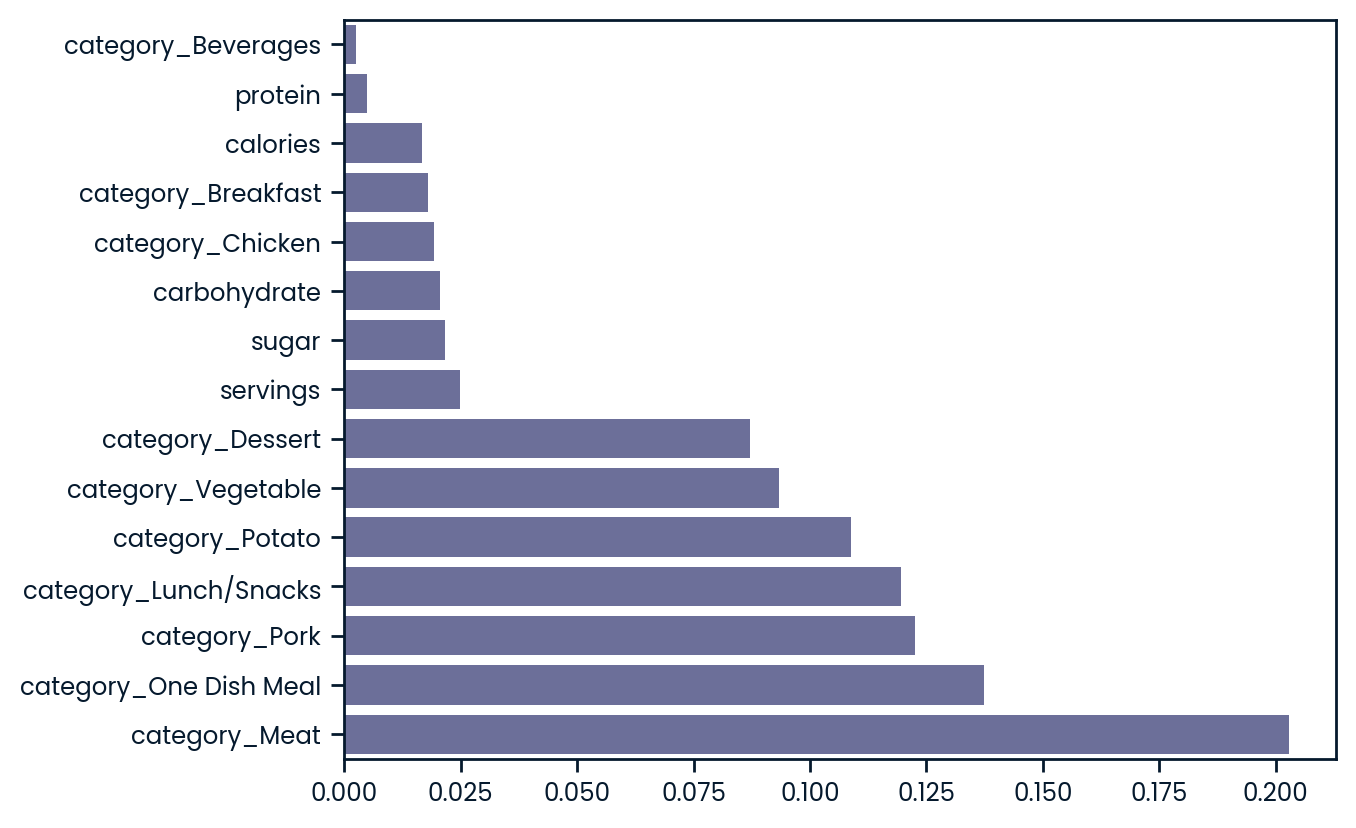

In [27]:
#create a listof the features without the objective variable
features=list(X.columns)

#Compute the importance of each feature
importance = gradient.feature_importances_

#Sort the features by importance
index = list(np.argsort(importance)[::-1])
#Print the names of the features in order of importance
names = [features[i] for i in index]

#Plot the sorted importances
sns.barplot(y=names,x=np.sort(importance))
plt.show()

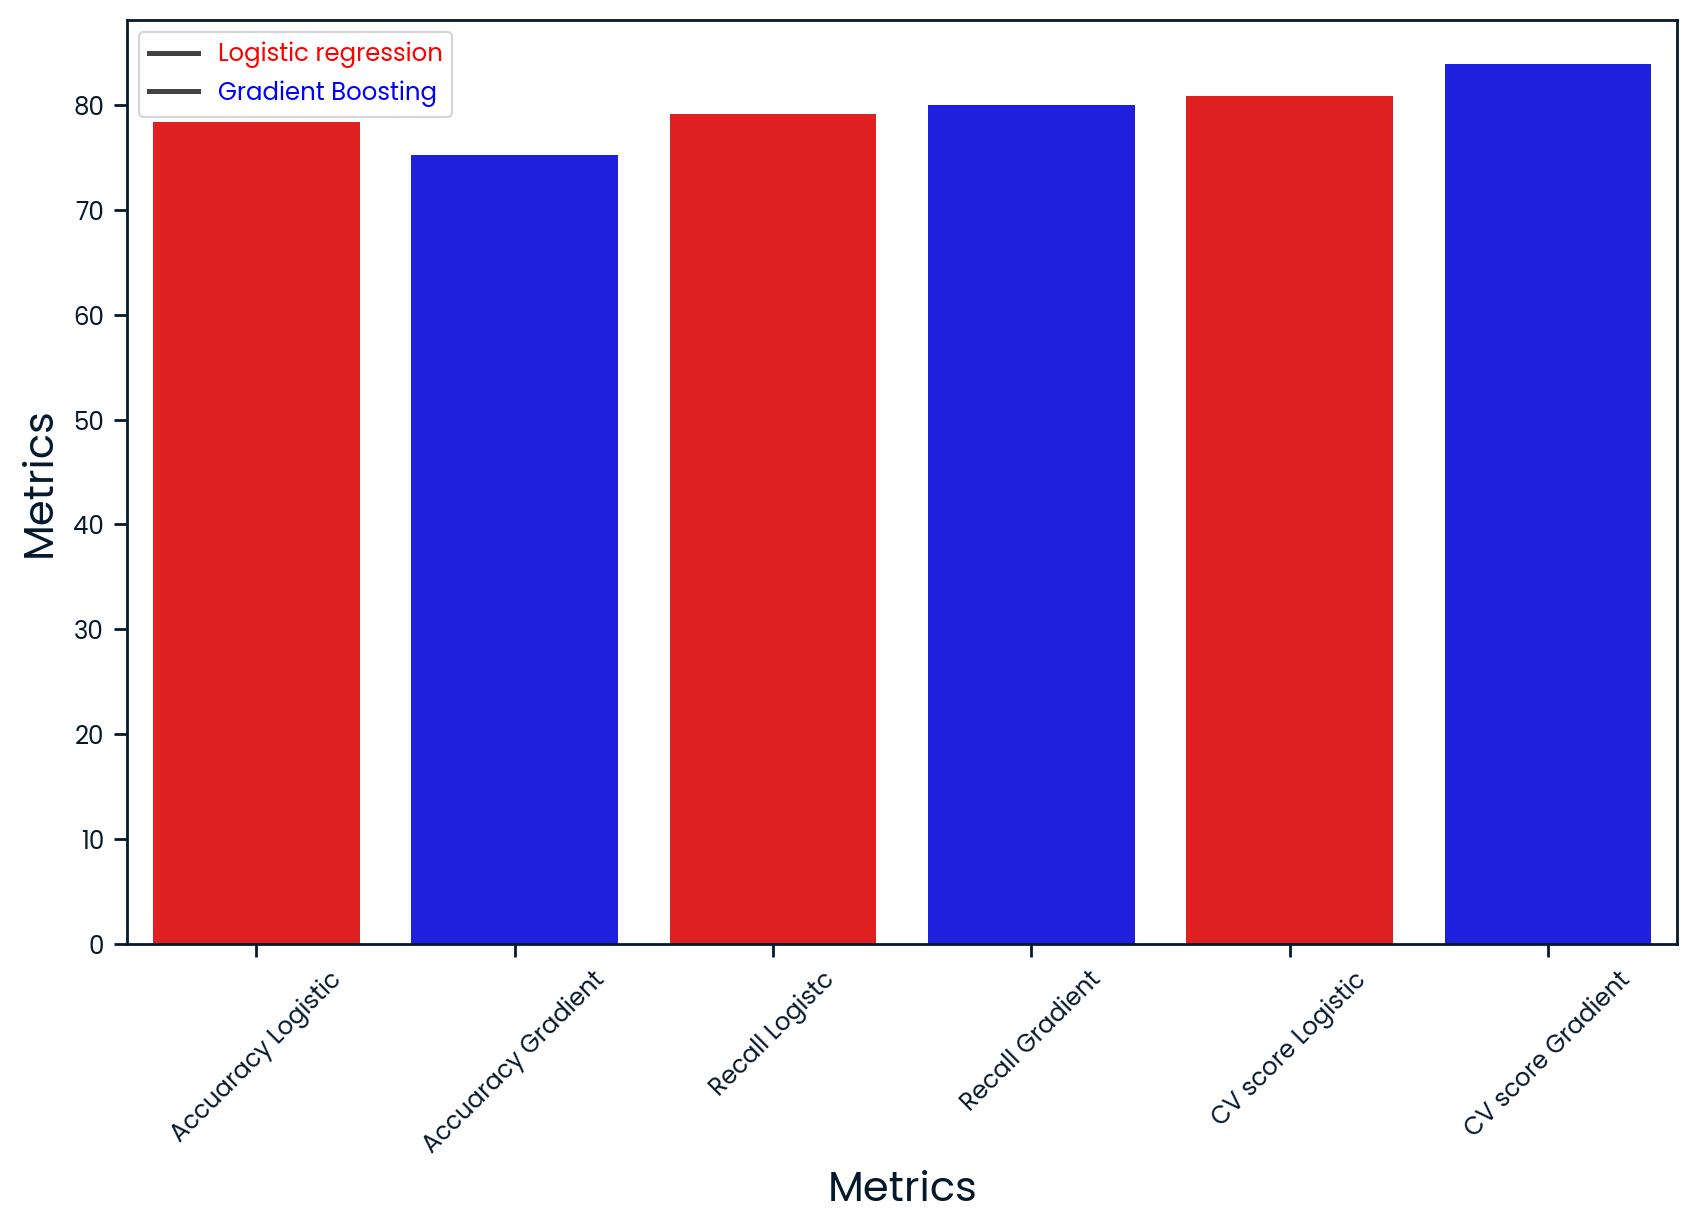

In [30]:
metrics=[logit_accuaracy,gradient_accuaracy,logit_recall,gradient_recall,logit_cv_score,gradient_cv_score]
metrics=[metric*100 for metric in metrics]
labels=["Accuaracy Logistic", "Accuaracy Gradient", "Recall Logistc", "Recall Gradient", "CV recall score Logistic", "CV recall score Gradient"]
colors=(["red","blue"])
df = pd.DataFrame({"Metrics": metrics, "Labels": labels})

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x="Labels", y="Metrics",palette=colors)
plt.xticks(rotation=45)
plt.xlabel("Metrics")
plt.legend(["Logistic regression","Gradient Boosting"],labelcolor=["red","blue"])



# Model evaluation
After fitting both models we obtained different results:

**Logistic regression**: We fitted our logistic regression model and achieved promising results, with an overall accuracy of 78%, meaning 78% out of all observations were correctly classified. Additionally, the model identified over 80% of samples belonging to high_traffic observations right with our train test split.
Since our goal is to correctly predict high-traffic recipes at least 80% of the time, we should emphasize the recall metric. Encouragingly, this target is met if we focus on the Cross validation score but roughly.

**Gradien Boosting classification**: Despite being a much more sophisticated model, there is not such a big difference in performance as might be expected (maybe because of the size of data). Having slightly smaller accuaracy. Nevertheless our goal is met with an 83.99% mean of high traffic cases  correctly identified over different train test splits with the recall cross validation score.

Therefore sticking to recall metrics and for predictive reasons I have to stick with the gradient boosting classification despite not having more satisfactory results in other metrics.

# Business metrics & recommendations

We plan to stick to this Gradient boosting model with the chosen hyperparameters, around 84% of high traffic recipies will be correctly identified.

Moreover, based on the results, we observe that category is the most significant variable influencing whether a recipe drives high traffic to our website.

The company should therefore:
- Try to capture more recipies and fix data errors.
- Test the validity of the model in new posts.
- From model and past data specifically, the business should prioritize posting recipes in categories such as meat, one-dish meals, lunch & snacks, and vegetables, while deprioritizing chicken, beverages, and desserts.
- In contrast, factors like the number of servings and nutritional attributes appear to have minimal impact on traffic outcomes. Therefore, these could still be posted to the website without the expectation of a strong traffic response.

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation